In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy
from scipy import stats
datafile = pd.read_csv("C:/Users/Toby/Downloads/456782694_diabetes_(2)_2586284164633567.csv")

In [ ]:
datafile.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
datafile.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
datafile = datafile.loc[datafile['Glucose'] * datafile['BloodPressure']* datafile['SkinThickness']* datafile['Insulin']* datafile['BMI']* datafile['DiabetesPedigreeFunction']* datafile['Age'] != 0]

In [ ]:
datafile.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   392.000000  392.000000     392.000000     392.000000  392.000000   
mean      3.301020  122.627551      70.663265      29.145408  156.056122   
std       3.211424   30.860781      12.496092      10.516424  118.841690   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      21.000000   76.750000   
50%       2.000000  119.000000      70.000000      29.000000  125.500000   
75%       5.000000  143.000000      78.000000      37.000000  190.000000   
max      17.000000  198.000000     110.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  392.000000                392.000000  392.000000  392.000000  
mean    33.086224                  0.523046   30.864796    0.331633  
std      7.027659                  0.345488   10.200777    0.471401  
min     18.200000                  0.085000   21.000000    0.000000  
25%     28.400000                  0.269750   23.000000    0.000000  
50%     33.200000                  0.449500   27.000000    0.000000  
75%     37.100000                  0.687000   36.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
datafile.groupby('Outcome')['BloodPressure'].describe()

count       mean        std   min   25%   50%   75%    max
Outcome                                                            
0        262.0  68.969466  11.892841  24.0  60.0  70.0  76.0  106.0
1        130.0  74.076923  13.021518  30.0  66.5  74.0  82.0  110.0

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

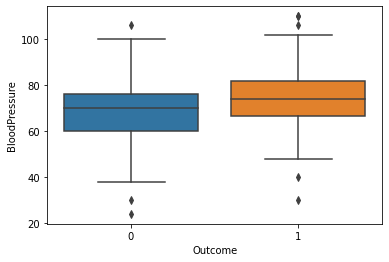

In [ ]:
sbn.boxplot(x="Outcome", y="BloodPressure", data=datafile)

In [ ]:
notdiab = datafile[datafile['Outcome'] == 0]['BloodPressure']
diab = datafile[datafile['Outcome'] == 1]['BloodPressure']

stats.ttest_ind(notdiab, diab)

Ttest_indResult(statistic=-3.8776478026014862, pvalue=0.00012374786935027577)

Text(0.5, 1.0, 'Two-Sample T-test')

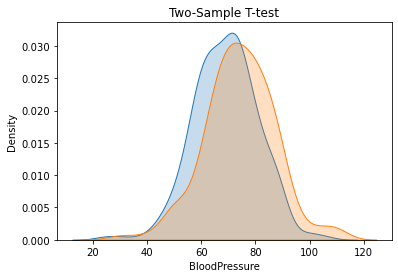

In [ ]:
sbn.kdeplot(notdiab, shade=True)
sbn.kdeplot(diab, shade=True)
plt.title("Two-Sample T-test")

In [ ]:
X = datafile[['Age', 'Glucose', 'Insulin', 'BMI','SkinThickness']]
y = datafile['BloodPressure']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Age               0.334894
Glucose           0.043852
Insulin          -0.012077
BMI               0.633385
SkinThickness    -0.086397

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

Actual  Predicted
296      70  64.797666
545      90  75.237524
142      52  68.260952
723      86  78.681007
644      72  65.192113
..      ...        ...
208      64  67.466950
135      60  72.432323
120      76  81.705952
508      50  65.645683
421      68  63.729298

[79 rows x 2 columns]

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))

MAE: 10.10934606538259
MSE: 174.54280632027428


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('BloodPressure ~ Outcome', data=datafile).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df          F    PR(>F)
Outcome    2266.564526    1.0  15.036152  0.000124
Residual  58788.986494  390.0        NaN       NaN


In [ ]:

datafile['BMILabel'] = pd.cut(x=datafile['BMI'], bins=[0, 18.5, 24.9, 29.9, 67.1],
                     labels=['Underweight', 'healthy', 'Overweight',
                             'Obese'])

In [ ]:
datafile['GlucoseLabel'] = pd.cut(x=datafile['Glucose'], bins=[0, 140, 199, 250],
                     labels=['Normal', 'Prediabetes', 'Diabetes'])

In [ ]:
datafile.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome    BMILabel GlucoseLabel  
3                      0.167   21        0  Overweight       Normal  
4                      2.288   33        1       Obese       Normal  
6                      0.248   26        1       Obese       Normal  
8                      0.158   53        1       Obese  Prediabetes  
13                     0.398   59        1       Obese  Prediabetes

<AxesSubplot:xlabel='BMILabel', ylabel='BloodPressure'>

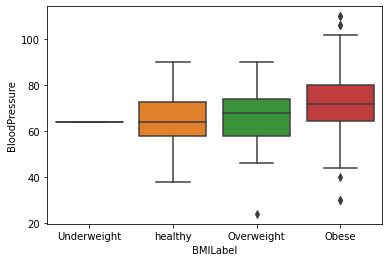

In [ ]:
#create boxplot
sbn.boxplot(x="BMILabel", y="BloodPressure", data=datafile)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('BloodPressure ~ BMILabel', data=datafile).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
BMILabel   3910.767059    3.0  8.851071  0.000011
Residual  57144.783961  388.0       NaN       NaN


In [ ]:
#post hoc tests: tukey hsd
#tukey hsd with bonferroni's correction
pair_t = mod.t_test_pairwise('BMILabel')
pair_t.result_frame

coef    std err         t     P>|t|  \
healthy-Underweight     0.909091  12.273046  0.074072  0.940991   
Overweight-Underweight  2.976471  12.207091  0.243831  0.807490   
Obese-Underweight       8.851145  12.159051  0.727947  0.467085   
Overweight-healthy      2.067380   2.253884  0.917252  0.359580   
Obese-healthy           7.942054   1.977225  4.016767  0.000071   
Obese-Overweight        5.874674   1.514876  3.877991  0.000124   

                        Conf. Int. Low  Conf. Int. Upp.  pvalue-hs  reject-hs  
healthy-Underweight         -23.220906        25.039088   0.962940      False  
Overweight-Underweight      -21.023854        26.976795   0.962940      False  
Obese-Underweight           -15.054726        32.757016   0.848653      False  
Overweight-healthy           -2.363974         6.498733   0.831787      False  
Obese-healthy                 4.054638        11.829471   0.000425       True  
Obese-Overweight              2.896282         8.853067   0.000618       True

In [ ]:
import pingouin as pg

aov = pg.anova(data=datafile, dv='BloodPressure',between='BMILabel',detailed=True)
print(aov)

     Source            SS   DF           MS         F     p-unc       np2
0  BMILabel   3910.767059    3  1303.589020  8.851071  0.000011  0.064053
1    Within  57144.783961  388   147.280371       NaN       NaN       NaN


In [ ]:
pt = pg.pairwise_tukey(dv='BloodPressure',between='BMILabel',effsize='cohen',data=datafile)
print(pt)

             A           B    mean(A)    mean(B)      diff         se  \
0  Underweight     healthy  64.000000  64.909091 -0.909091  12.273046   
1  Underweight  Overweight  64.000000  66.976471 -2.976471  12.207091   
2  Underweight       Obese  64.000000  72.851145 -8.851145  12.159051   
3      healthy  Overweight  64.909091  66.976471 -2.067380   2.253884   
4      healthy       Obese  64.909091  72.851145 -7.942054   1.977225   
5   Overweight       Obese  66.976471  72.851145 -5.874674   1.514876   

          T   p-tukey     cohen  
0 -0.074072  0.999854 -0.074909  
1 -0.243831  0.994899 -0.245261  
2 -0.727947  0.885871 -0.729335  
3 -0.917252  0.795655 -0.170352  
4 -4.016767  0.000411 -0.654426  
5 -3.877991  0.000712 -0.484074  
